In [1]:
import pandas as pd

## Завантаження даних, нічого особливо цікавого

In [58]:
def get_ria_page(n):
    print('Loading dom.ria page', n)
    url = (
        "https://dom.ria.com/uk/search/xls/?page={page}&limit=100"
        "&from_realty_id=&to_realty_id=&sort=0&category=1&realty_type=2"
        "&operation_type=3&state_id=5&city_id%5B9%5D=5"
        "&date_from=&date_to=&email=&period=0&xls=1"
    ).format(page=n)
    return pd.read_excel(url, index_col='Realty ID')

def get_all_ria_pages():
    page = 1
    pages = []
    while True:
        more_data = get_ria_page(page)
        if(len(more_data.index)):
            pages.append(more_data)
            page += 1
        else:
            return pd.concat(pages)

In [59]:
df = get_all_ria_pages()

Loading dom.ria page 1
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
Loading dom.ria page 2
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
Loading dom.ria page 3
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
Loading dom.ria page 4
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
Loading dom.ria page 5
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
Loading dom.ria page 6
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
Loading dom.ria page 7
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
Loading dom.ria page 8
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
Loading dom.ria page 9
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
Loading dom.ria page 10
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
Loading dom.ria page 11
WARNING *** OLE

## Зберігаємо їх в файл щоб зайвий раз не завантажувати

In [62]:
df.to_csv('all.csv', encoding='utf-8')

## Очистка даних. Відкидаємо ті що дуже не вписуються в статистику, договірні ціни, ціни не в гривнях і т.п.

In [121]:
def data_filter(d):
    return (
        d['Тип ціни'] == 'грн'
        and 0 < d['Ціна '] < 20000
        and 0 < d['Кімнат '] < 6
    )

cleared_df = df.apply(pd.to_numeric, errors='coerce')[df.apply(data_filter, axis=1)][['Ціна ', 'Тип ціни', 'Кімнат ', 'Загальна площа ', 'Житлова площа']]

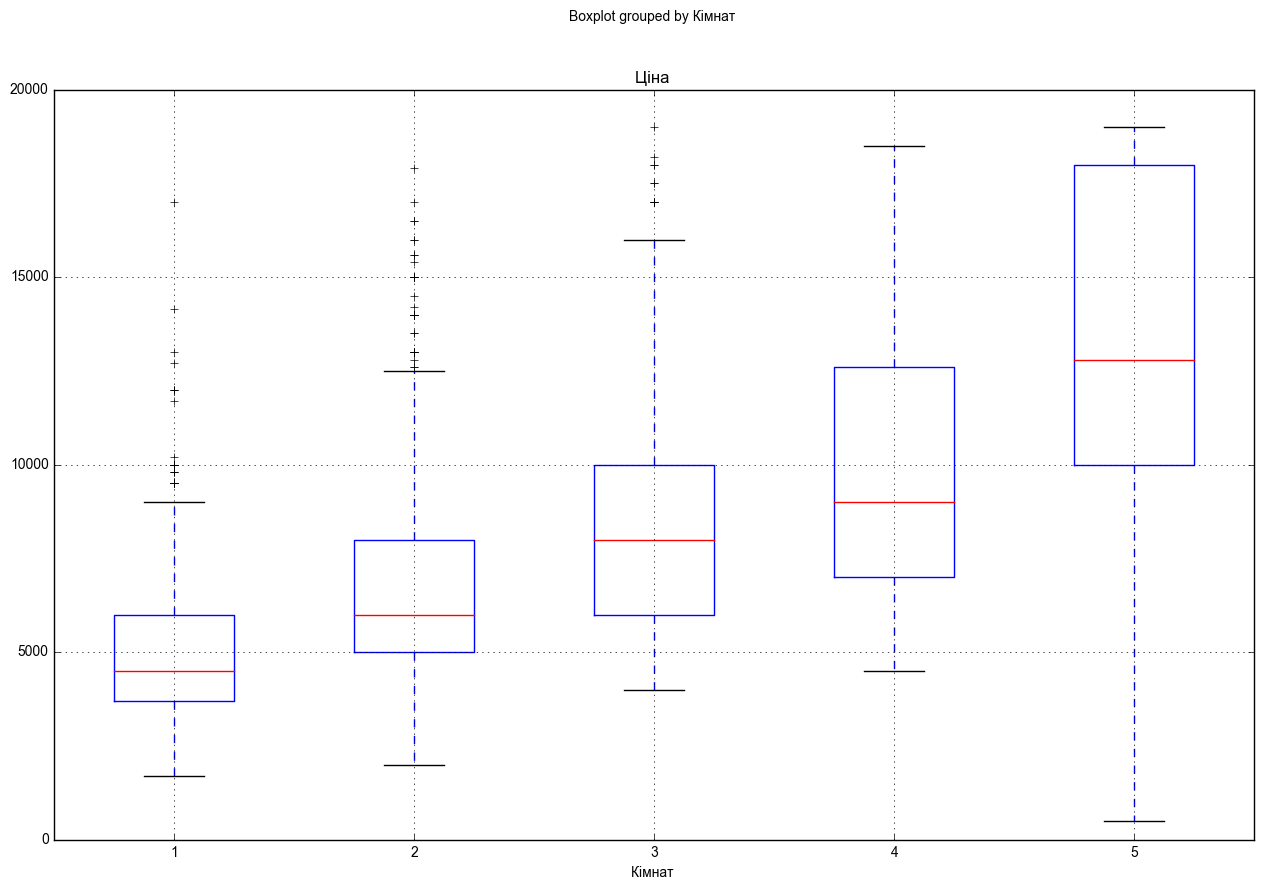

In [125]:
cleared_df.boxplot(column='Ціна ', by='Кімнат ', figsize=(15, 10))

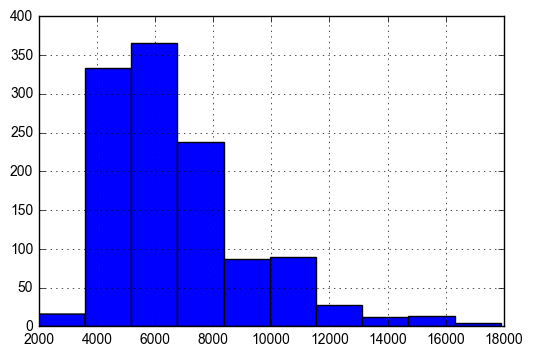

In [133]:
cleared_df[cleared_df['Кімнат '] == 2]['Ціна '].hist()

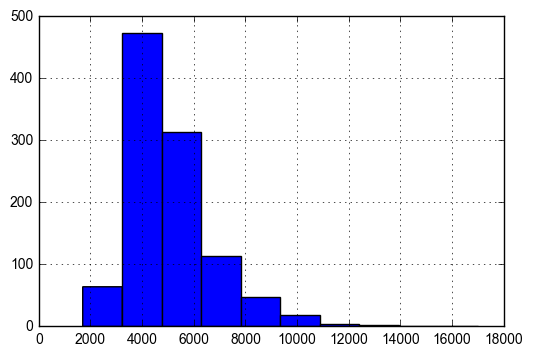

In [134]:
cleared_df[cleared_df['Кімнат '] == 1]['Ціна '].hist()